# CX (CNOT) gate

In [2]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

qc = QuantumCircuit(2)

# This calculates the statevector after the circuit
ket = Statevector(qc)
ket.draw(output='latex')

<IPython.core.display.Latex object>

In [3]:
qc.cx(0, 1)

ket = Statevector(qc)
ket.draw(output='latex')

<IPython.core.display.Latex object>

In [4]:
qc.cx(1, 0)

ket = Statevector(qc)
ket.draw(output='latex')

<IPython.core.display.Latex object>

In [5]:
qc.x(1)

ket = Statevector(qc)
ket.draw(output='latex')

<IPython.core.display.Latex object>

In [6]:
qc.cx(1, 0)

ket = Statevector(qc)
ket.draw(output='latex')

<IPython.core.display.Latex object>

In [7]:
# Let's create a fresh circuit
qc = QuantumCircuit(2)

qc.h(1)

ket = Statevector(qc)
ket.draw(output='latex')

<IPython.core.display.Latex object>

In [8]:
qc.cx(1, 0)

ket = Statevector(qc)
ket.draw(output='latex')

<IPython.core.display.Latex object>

In [10]:
qc = QuantumCircuit(2)

qc.h(0)
qc.h(1)

ket = Statevector(qc)
ket.draw(output='latex')

<IPython.core.display.Latex object>

In [11]:
qc.cx(1, 0)

ket = Statevector(qc)
ket.draw(output='latex')

<IPython.core.display.Latex object>

In [12]:
qc.z(0)

ket = Statevector(qc)
ket.draw(output='latex')

<IPython.core.display.Latex object>

In [13]:
qc.cx(1, 0)

ket = Statevector(qc)
ket.draw(output='latex')

<IPython.core.display.Latex object>

# Superdense coding

In [21]:
# The message
MESSAGE = '00'

# ALice encodes the message
qc_alice = QuantumCircuit(2, 2)
if MESSAGE[-1] == '1':
    qc_alice.x(0)
if MESSAGE[-2] == '1':
    qc_alice.x(1)

In [22]:
from qiskit import Aer
backend = Aer.get_backend('aer_simulator')

# Bob measures
qc_bob = QuantumCircuit(2, 2)
qc_bob.measure([0, 1], [0, 1])

backend.run(qc_alice.compose(qc_bob)).result().get_counts()

{'00': 1024}

> This was a 'normal' way to do it

> Now let's see another method

In [27]:
MESSAGE = '00'

qc_alice = QuantumCircuit(2, 2)

# Alice encodes the message
if MESSAGE[-1] == '1':
    qc_alice.x(0)
if MESSAGE[-2] == '1':
    qc_alice.x(1)
    
# then she creates an entangled states
qc_alice.h(1)
qc_alice.cx(1, 0)

ket = Statevector(qc_alice)
ket.draw(output='latex')

<IPython.core.display.Latex object>

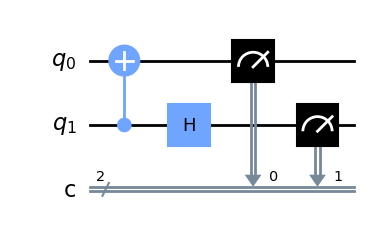

In [29]:
qc_bob = QuantumCircuit(2, 2)
# Bob disentangles
qc_bob.cx(1, 0)
qc_bob.h(1)
# Then measures
qc_bob.measure([0, 1], [0, 1])

qc_bob.draw(output='mpl')

-> Here we haven't any advantage to use entanglement

In [30]:
MESSAGE = '00'

qc_alice = QuantumCircuit(2, 2)
qc_alice.h(1)
qc_alice.cx(1, 0)

if MESSAGE[-2] == '1':
    qc_alice.z(1)
if MESSAGE[-1] == '1':
    qc_alice.x(1)
    
ket = Statevector(qc_alice)
ket.draw(output='latex')

<IPython.core.display.Latex object>

In [31]:
backend.run(qc_alice.compose(qc_bob)).result().get_counts()

{'00': 1024}

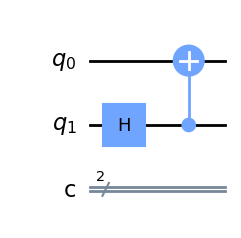

In [32]:
qc_charlie = QuantumCircuit(2, 2)

qc_charlie.h(1)
qc_charlie.cx(1, 0)

qc_charlie.draw(output='mpl')

In [33]:
MESSAGE = '01'

qc_alice = QuantumCircuit(2, 2)

if MESSAGE[-2] == '1':
    qc_alice.z(1)
if MESSAGE[-1] == '1':
    qc_alice.x(1)

In [34]:
complete_qc = qc_charlie.compose(qc_alice.compose(qc_bob))
backend.run(complete_qc).result().get_counts()

{'01': 1024}

## Exercice sur IBM

In [35]:
from qiskit import QuantumCircuit

from qiskit.providers.ibmq import IBMQ, least_busy
IBMQ.save_account(token="1fe4ce1b8edb6b3beeb02b9d17f39551a5cff261a545b1ee19bef888399da4bba828527b74bcd4c2b3b670445a8748a2df010606ec942d43dadcdc3b25322234")
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
device = least_busy(
            provider.backends(
                filters= lambda x: not x.configuration().simulator
            )
        )
print(f'Running on {device.name()}')

from qiskit import transpile
from qiskit.tools import job_monitor
from qiskit.visualization import plot_histogram

def encodeState(circuit, message):
    circuit.h(1)
    circuit.cx(1, 0)
    if message[-2] == '1':
        circuit.z(1)
    if message[-1] == '1':
        circuit.x(1)
    return circuit

configrc.store_credentials:WARNING:2023-01-06 15:19:17,927: Credentials already present. Set overwrite=True to overwrite.


Running on ibmq_lima


Job Status: job has successfully run


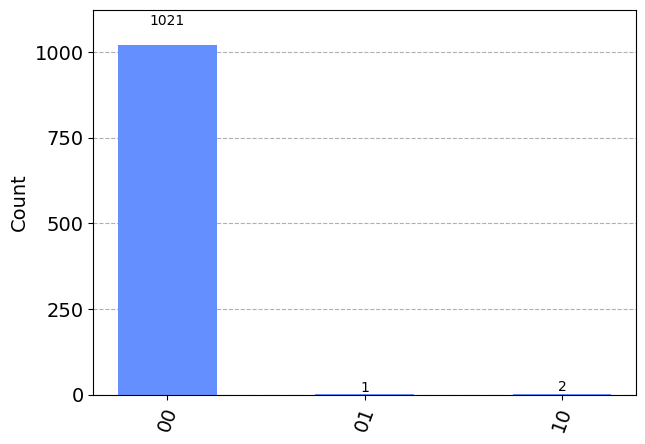

In [36]:
mess00 = encodeState(QuantumCircuit(2, 2), '00').compose(qc_bob)

job_mess00 = device.run(transpile(mess00, device, optimization_level=3), shots=1024)
job_monitor(job_mess00)
plot_histogram(job_mess00.result().get_counts())

Job Status: job has successfully run


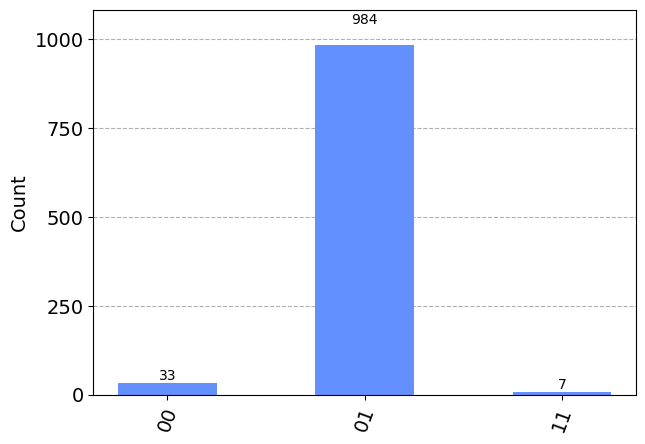

In [37]:
mess01 = encodeState(QuantumCircuit(2, 2), '01').compose(qc_bob)

job_mess01 = device.run(transpile(mess01, device, optimization_level=3), shots=1024)
job_monitor(job_mess01)
plot_histogram(job_mess01.result().get_counts())

Job Status: job has successfully run


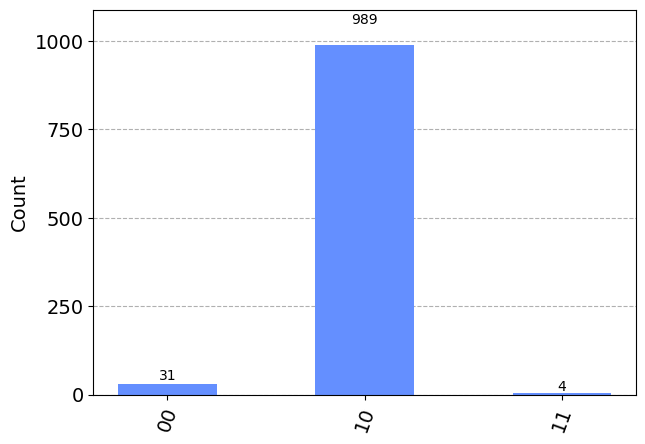

In [38]:
mess10 = encodeState(QuantumCircuit(2, 2), '10').compose(qc_bob)

job_mess10 = device.run(transpile(mess10, device, optimization_level=3), shots=1024)
job_monitor(job_mess10)
plot_histogram(job_mess10.result().get_counts())

Job Status: job has successfully run


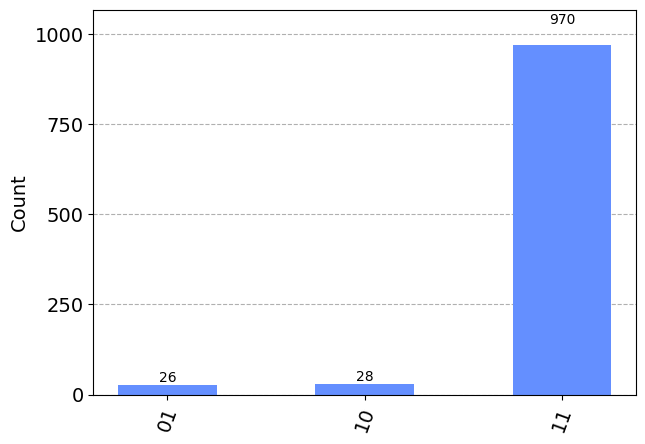

In [39]:
mess11 = encodeState(QuantumCircuit(2, 2), '11').compose(qc_bob)

job_mess11 = device.run(transpile(mess11, device, optimization_level=3), shots=1024)
job_monitor(job_mess11)
plot_histogram(job_mess11.result().get_counts())

# Hardy Paradox

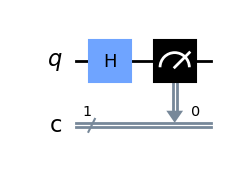

In [40]:
meas_x = QuantumCircuit(1, 1)
meas_x.h(0)
meas_x.measure(0, 0)

meas_x.draw(output='mpl')

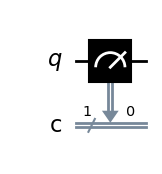

In [41]:
meas_z = QuantumCircuit(1, 1)
meas_z.measure(0, 0)

meas_z.draw(output='mpl')

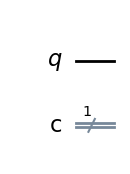

In [42]:
qc = QuantumCircuit(1, 1)

qc.draw(output='mpl')

In [43]:
z_meas_counts = backend.run(qc.compose(meas_z)).result().get_counts()
print('Result from z measurment:', z_meas_counts)

Result from z measurment: {'0': 1024}


In [48]:
x_meas_counts = backend.run(qc.compose(meas_x)).result().get_counts()
print('Result from x measurment:', x_meas_counts)

Result from x measurment: {'0': 515, '1': 509}


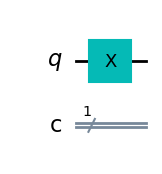

In [49]:
qc = QuantumCircuit(1, 1)
qc.x(0)

qc.draw(output='mpl')

In [52]:
for basis,circ in [('z', meas_z), ('x', meas_x)]:
    print('Result from {} measurment:'.format(basis), backend.run(qc.compose(circ)).result().get_counts())

Result from z measurment: {'1': 1024}
Result from x measurment: {'1': 528, '0': 496}


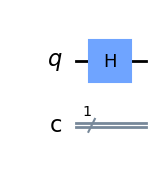

In [53]:
qc = QuantumCircuit(1, 1)
qc.h(0)

qc.draw(output='mpl')

In [54]:
for basis,circ in [('z', meas_z), ('x', meas_x)]:
    print('Result from {} measurment:'.format(basis), backend.run(qc.compose(circ)).result().get_counts())

Result from z measurment: {'1': 497, '0': 527}
Result from x measurment: {'0': 1024}


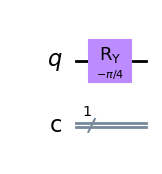

In [55]:
from math import pi

qc = QuantumCircuit(1, 1)
qc.ry(-pi/4, 0)

qc.draw(output='mpl')

In [56]:
for basis,circ in [('z', meas_z), ('x', meas_x)]:
    print('Result from {} measurment:'.format(basis), backend.run(qc.compose(circ)).result().get_counts())

Result from z measurment: {'0': 854, '1': 170}
Result from x measurment: {'1': 882, '0': 142}


# Unique quantum correlations

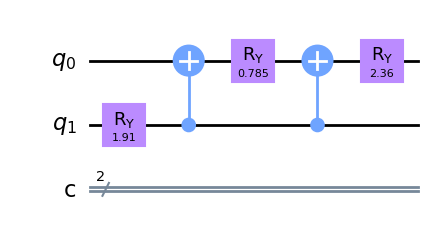

In [57]:
qc_charlie = QuantumCircuit(2, 2)
qc_charlie.ry(1.911, 1)
qc_charlie.cx(1, 0)
qc_charlie.ry(0.785, 0)
qc_charlie.cx(1, 0)
qc_charlie.ry(2.356, 0)

qc_charlie.draw(output='mpl')

In [58]:
meas_zz = QuantumCircuit(2, 2)
meas_zz.measure([0, 1], [0, 1])

Result from z measurments:


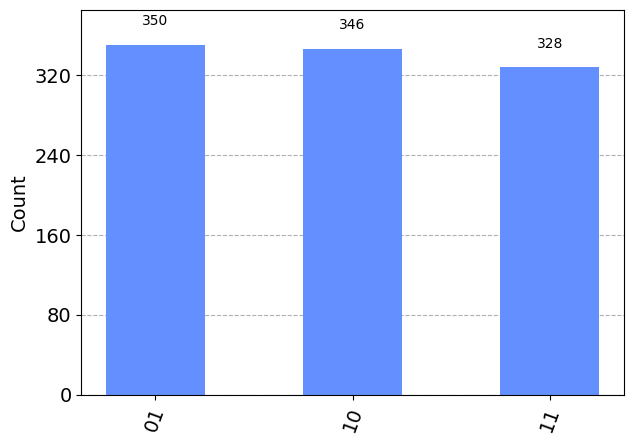

In [61]:
print('Result for z measurments:')
counts = backend.run(qc_charlie.compose(meas_zz)).result().get_counts()
plot_histogram(counts)

Result for a z and an x measurment:


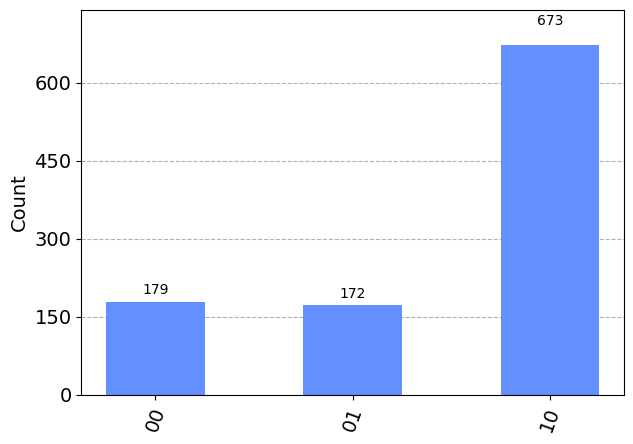

In [64]:
meas_zx = QuantumCircuit(2, 2)
meas_zx.h(0)
meas_zx.measure([0, 1], [0, 1])

print('Result for a z and an x measurment:')
counts = backend.run(qc_charlie.compose(meas_zx)).result().get_counts()
plot_histogram(counts)

Result for an x and a z measurment:


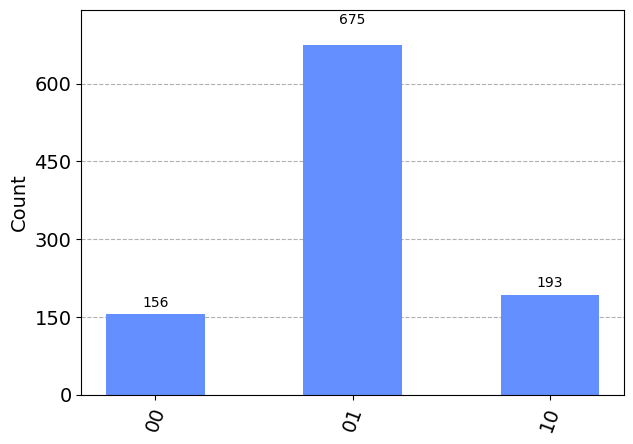

In [65]:
meas_xz = QuantumCircuit(2, 2)
meas_xz.h(1)
meas_xz.measure([0, 1], [0, 1])

print('Result for an x and a z measurment:')
counts = backend.run(qc_charlie.compose(meas_xz)).result().get_counts()
plot_histogram(counts)

Result for an x and an x measurment:


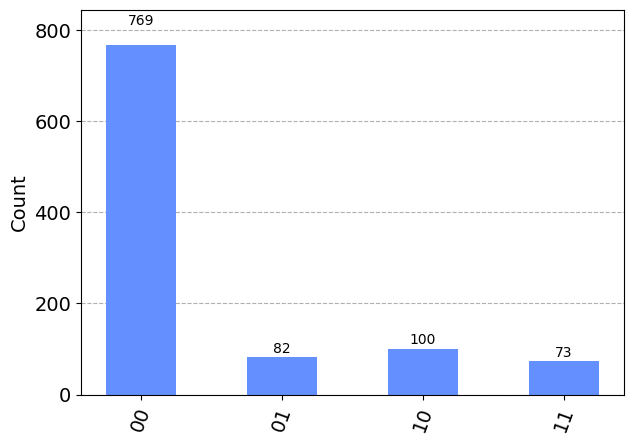

In [67]:
meas_xx = QuantumCircuit(2, 2)
meas_xx.h([0, 1])
meas_xx.measure([0, 1], [0, 1])

print('Result for an x and an x measurment:')
counts = backend.run(qc_charlie.compose(meas_xx)).result().get_counts()
plot_histogram(counts)

In [69]:
import qiskit.tools.jupyter
%qiskit_version_table